# 人気10位以内抽出
その中で5着以内か否かを当てる

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

# データ読み込み

In [2]:
df = pd.read_pickle("2015-2020.pkl")
df.shape

(249206, 40)

## 障害レース除外

In [3]:
df = df.loc[~(df["race_type"] == "障")]
df.shape

(241583, 40)

## 目的変数作成(0か1の二項分類)

In [4]:
df["5th"] = 0
# 5位以内なら1
df.loc[df["order"] <= 5, "5th"] = 1

In [5]:
# ランダムに確認
df.sample(5)

,race_id,race_date,race_number,race_name,race_course,event_date,race_type,race_distance,race_weather,race_state,horses,expect1,expect2,expect3,uren1,uren2,sanfuku1,sanfuku2,order,frame,number,name,gender,age,jockey,odds,popular,area,trainer,prize,speed_min_max,agari_min_max,past_horse_agari_mean,past_horse_order_mean,past_horse_prize_sum,past_horse_speed_mean,past_jockey_order_mean,past_jockey_prize_sum,past_trainer_order_mean,past_trainer_prize_sum,5th
176463,201609030501,2016-06-18,1,2歳未勝利,阪神,5,芝,1400,晴,稍重,8,3,2,5,6860,0,1430,0,5,7,7,ハンズスミス,牡,2,和田竜二,16.6,3,西,西村真幸,50.0,0.211483,0.800000,0.384615,3.0,180.0,0.676703,6.80,6219.2,8.38,9253.6,1
24624,201904020307,2019-08-03,7,3歳未勝利,新潟,3,芝,1600,晴,良,18,4,9,2,4750,0,13310,0,10,5,10,クノイチ,牝,3,内田博幸,112.9,13,東,古賀慎明,0.0,0.890407,0.153846,0.717054,10.0,0.0,0.505327,7.28,7733.2,6.87,11692.3,0
105347,201708050808,2017-11-26,8,3歳以上1000万下,京都,8,ダ,1900,晴,良,15,5,2,4,2560,0,10810,0,11,1,1,ピントゥリッキオ,牝,4,大野拓弥,127.3,14,東,池上昌和,0.0,0.615028,0.411765,0.161765,7.5,0.0,0.650812,7.36,6298.8,8.93,5100.0,0
36794,201908030308,2019-04-28,8,糺の森特別,京都,3,芝,1800,晴,良,11,6,7,2,3110,0,6800,0,10,6,7,サウンドマジック,牝,5,藤井勘一,50.7,10,東,和田正一,0.0,0.085264,0.962264,0.764286,14.5,0.0,0.348516,7.36,7242.6,7.84,19163.8,0
15577,201905040312,2019-10-15,12,3歳以上1勝クラス,東京,3,ダ,1600,曇,稍重,10,7,8,5,3620,0,58440,0,5,7,7,メンディ,牡,3,木幡初也,5.5,3,東,杉浦宏昭,75.0,0.761213,0.394737,0.602926,6.5,190.0,0.516195,10.02,2085.0,7.23,11791.8,1


In [6]:
# レース数
len(df["race_id"].unique())

17030

In [7]:
# 平均出頭数
df.shape[0] / len(df["race_id"].unique())

14.1857310628303

In [8]:
# 一番古い日
df["race_date"].min()

Timestamp('2015-01-04 00:00:00')

In [9]:
# 一番新しい日
df["race_date"].max()

Timestamp('2020-02-09 00:00:00')

In [10]:
# 人気11位以降の馬が、結果５位以内に入っている数
df.loc[(df["popular"] > 10) & (df["5th"] == 1)].count()[0]

6989

In [11]:
# その割合
print(f"{(6989 / df.shape[0]) * 100:.3}%")

2.89%


In [12]:
# 何頭立てレースが多いか
df["horses"].value_counts()

16    103342
15     28642
18     25306
14     20064
13     16021
12     15212
11     10508
10      8257
9       5277
17      4696
8       3067
7        863
6        263
5         65
Name: horses, dtype: int64

In [13]:
# 人気の種類
df["popular"].value_counts()

1     16997
3     16997
4     16990
2     16988
6     16979
5     16977
7     16922
8     16798
9     16397
10    15781
11    14950
12    13966
13    12696
14    11422
15     9947
16     7779
17     1663
18     1334
Name: popular, dtype: int64

## 人気11位以下削除

In [14]:
df = df.loc[~(df["popular"] > 10)]

In [15]:
df.shape

(167826, 41)

In [16]:
# 人気の数再確認(11位以下はない)
df["popular"].value_counts()

3     16997
1     16997
4     16990
2     16988
6     16979
5     16977
7     16922
8     16798
9     16397
10    15781
Name: popular, dtype: int64

## この時点での1の割合

In [17]:
all_5 = df["5th"].sum()
all_record = df.shape[0]
print(f"5着以内に入った馬の数 {all_5:,}")
print(f"全馬レコード数 {all_record:,}")
print(f"5着以内に入った馬の割合 {all_5 / all_record:,}")
print(f"6着以下の馬の数 {all_record - all_5:,}")

5着以内に入った馬の数 78,201
全馬レコード数 167,826
5着以内に入った馬の割合 0.4659647492045333
6着以下の馬の数 89,625


In [18]:
# 全部0と答えると下の正解率
df.loc[df["5th"] == 0].count()[0]/all_record

0.5340352507954668

## 人気５位以内の馬が、５着以内に入っている数

In [19]:
df.loc[(df["order"] <= 5) & (df["popular"] <= 5)].count()[0]

53765

## 人気５位以内の馬が、５着以内に入る確率

In [20]:
53765 / df.shape[0]

0.3203615649541787

# 学習する前の下準備
レース前に知り得ない情報、不要カラムを外して、かつ相関がありそうなものだけピックアップ

In [21]:
# 説明変数
X = df[[
    'horses',
    'age',
    'odds',
    'popular',
    'past_horse_agari_mean',
    'past_horse_order_mean',
    'past_horse_prize_sum',
    'past_horse_speed_mean',
    'past_jockey_order_mean',
    'past_jockey_prize_sum',
    'past_trainer_order_mean', 
    'past_trainer_prize_sum'
]].copy()

# 目的変数
y = df["5th"]

In [22]:
X.head()

,horses,age,odds,popular,past_horse_agari_mean,past_horse_order_mean,past_horse_prize_sum,past_horse_speed_mean,past_jockey_order_mean,past_jockey_prize_sum,past_trainer_order_mean,past_trainer_prize_sum
0,16,3,11.3,4,0.350000,3.0,150.0,0.809415,9.74,3407.6,8.58,10741.7
1,16,3,3.8,2,0.279306,5.0,130.0,0.834979,4.46,21297.6,7.17,15379.7
2,16,3,1.6,1,0.016129,2.0,480.0,1.000000,8.24,4438.0,6.08,17585.5
3,16,3,19.9,6,0.049758,6.0,64.0,0.924364,6.90,13624.9,8.20,9629.9
4,16,3,9.6,3,0.189394,5.0,100.0,0.777167,5.96,12825.0,8.58,5307.6


In [23]:
y

0         1
1         1
2         1
3         1
4         1
         ..
249197    0
249200    0
249203    0
249204    0
249205    0
Name: 5th, Length: 167826, dtype: int64

In [24]:
X.shape

(167826, 12)

In [25]:
y.shape

(167826,)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [27]:
X_train.shape

(117478, 12)

In [28]:
y_train.shape

(117478,)

In [29]:
X_test.shape

(50348, 12)

In [30]:
y_test.shape

(50348,)

# 学習

In [31]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [32]:
%%time

lightgbm = lgb.LGBMClassifier(objective='binary', random_state=0)

params = {
    'num_leaves': [10, 70],
    'max_depth': [3, 9],
    'min_child_weight': [1, 5],
    'reg_alpha': [0, 100],
    'reg_lambda': [0, 100], 
}

# 適合率重視
gscv = GridSearchCV(
    estimator=lightgbm, 
    param_grid=params, 
    scoring='precision',
    cv=3
)

gscv.fit(X_train, y_train)

Wall time: 1min 58s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31,
                                      objective='binary', random_state=0,
                                      reg_alpha=0.0, reg_lambda=0.0,
                                      silent=True, subsample=1.0,
                                      subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 9],

In [33]:
gscv.best_params_

{'max_depth': 9,
 'min_child_weight': 1,
 'num_leaves': 70,
 'reg_alpha': 100,
 'reg_lambda': 0}

In [34]:
gscv.best_score_

0.6728812371173409

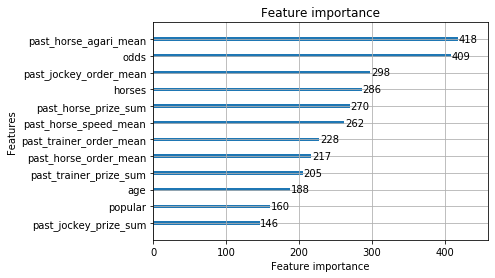

In [35]:
lgb.plot_importance(gscv.best_estimator_)

In [36]:
# テストデータを予測する
y_pred = (gscv.best_estimator_.predict(X_test) > 0.5).astype(int)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
confusion_matrix(y_test, y_pred)

array([[20014,  6874],
       [ 9252, 14208]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71     26888
           1       0.67      0.61      0.64     23460

    accuracy                           0.68     50348
   macro avg       0.68      0.67      0.68     50348
weighted avg       0.68      0.68      0.68     50348



正解率（accuracy） 0.68  
適合率（precision） 0.67 1を選択して当てた割合  
再現率（recall） 0.61 全1のうちの正解割合